# Car Price Prediction 

### Main objective:
Goal is to predict the price of the car using regression models given multible featureslisted below


### Description of the data set:
Here we use data that studies informations about cars including the following parameters:
1. (Make)>> the manifacture company of the car
2. (Model)>> the model of the car
3. (Year)>> year of manifacture
4. (Engine Fuel Type)
6. (Engine HP) >> Horse Power
7. (Engine Cylinders)>> number of cylinders
8. (Transmission Type)>> Automatic/Manual
9. (Driven_Wheels)>>Front/all
 10. (Number of Doors)
 11. (Market Category)>>crossover/Luxury
 12. (Vehicle Size)
 13. (Vehicle Style)
 14. (highway MPG)
 15. (city mpg)
 16. (Popularity)
 17. (MSRP)>> Manufacturer's Suggested [Retail Price]>> Our Target



### Plan for data exploration:
1. cleaning data 
    * removing unimportant data 
    * dealing with missing (NaN) values if found.
2. feature engineering 
    * visualizing the data and see the data distribution 
    * deal with skewed distribution if found
3. Variable Selection
    * encoding for categorical variables
    * feature scalling for continuous variables
4. Spliting the Data & implementing Cross Validation
    * Train-Test split
    * 
5. linear regression model
    * Linear regression
    * regulation using Ridge and Lasso


In [355]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

%matplotlib inline

### 1. cleaning data 


In [356]:
df = pd.read_csv("data/data.csv")
df.head(3).T

,0,1,2
Make,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series
Year,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0
Engine Cylinders,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance"


In [357]:
df.shape

(11914, 16)

In [358]:
df.describe()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [359]:
df.dtypes.to_frame().rename(columns={0:'Data Type'})

,Data Type
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [360]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = df.dtypes[df.dtypes == 'object'].index
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

In [361]:
df.head(3).T

,0,1,2
make,bmw,bmw,bmw
model,1_series_m,1_series,1_series
year,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0
engine_cylinders,6.0,6.0,6.0
transmission_type,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance"


In [362]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [363]:
df = df.fillna(0)

In [364]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [365]:
(df['model'].value_counts() == 1).sum()

40

### Log transforming skewed variables

In [366]:
# Create a list of float colums to check for skewing
mask = df.dtypes != object
num_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[num_cols].skew()

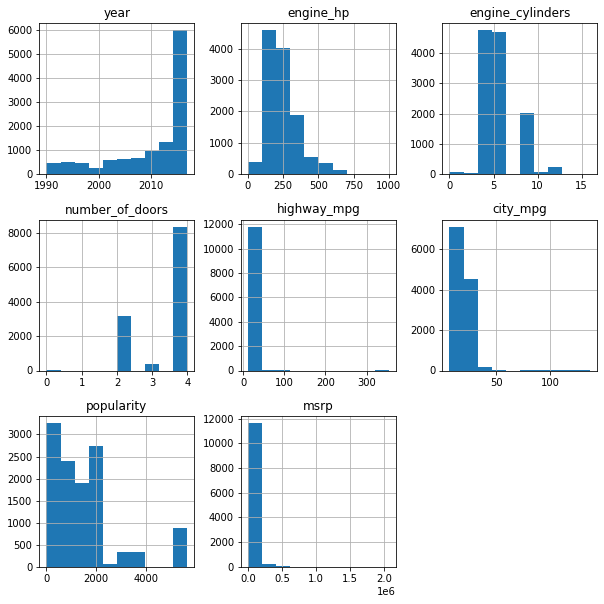

In [367]:
viz = df[num_cols]
viz.hist(figsize=(10,10))
plt.show()

In [368]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
msrp,11.771987
highway_mpg,7.573931
city_mpg,7.106681
popularity,1.653443
engine_hp,1.211076
engine_cylinders,0.877085
number_of_doors,-0.981560
year,-1.221981


In [369]:

skew_cols.Skew[skew_cols.Skew>1]

msrp           11.771987
highway_mpg     7.573931
city_mpg        7.106681
popularity      1.653443
engine_hp       1.211076
Name: Skew, dtype: float64

In [370]:
# Perform the skew transformation:
for col in skew_cols.Skew[skew_cols.Skew>1].index.values:
    
    df[col] = df[col].apply(np.log1p)

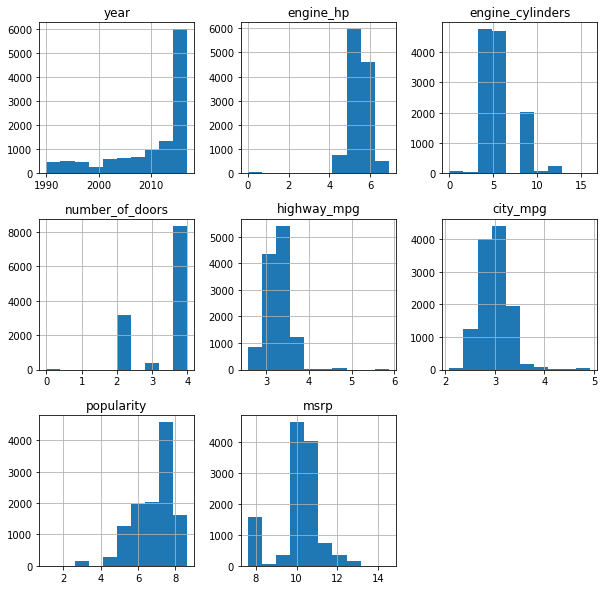

In [371]:
viz = df[num_cols]
viz.hist(figsize=(10,10))
plt.show()

In [372]:
skew_vals = df[num_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
city_mpg,1.530185
engine_cylinders,0.877085
highway_mpg,0.796524
popularity,-0.781916
msrp,-0.917868
number_of_doors,-0.981560
year,-1.221981
engine_hp,-4.479222


### One Hot Encoding

In [373]:
# Select the object (string) columns
mask = df.dtypes == object
categorical_cols = df.columns[mask]

In [374]:
# Determine number of unique values in each categorical column
num_ohc_cols = df[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)
num_ohc_cols

model                914
market_category       72
make                  48
vehicle_style         16
engine_fuel_type      11
transmission_type      5
driven_wheels          4
vehicle_size           3
dtype: int64

In [375]:
#we will remove 'model' column
num_ohc_cols= num_ohc_cols.drop('model')
df = df.drop(columns='model')


In [376]:
# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1
small_num_ohc_cols.sum()

152

This is 152 columns, assuming the original ones are dropped. 

In [377]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

# Copy of the data
data_ohc = df.copy()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    # dat = le.fit_transform(data_ohc[col]).astype(str)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [378]:
# Column difference is as calculated below
data_ohc.shape[1] - df.shape[1]

189

In [379]:
df_final = data_ohc.copy()
df_final.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,market_category_0,market_category_1,...,vehicle_size_18,vehicle_size_19,vehicle_size_20,vehicle_size_21,vehicle_size_22,vehicle_size_23,vehicle_size_24,vehicle_size_25,vehicle_size_26,vehicle_size_27
0,2011,5.817111,6.0,2.0,3.295837,2.995732,8.273081,10.739349,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,5.707110,6.0,2.0,3.367296,2.995732,8.273081,10.612779,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,5.707110,6.0,2.0,3.367296,3.044522,8.273081,10.500977,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,5.442418,6.0,2.0,3.367296,2.944439,8.273081,10.290483,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,5.442418,6.0,2.0,3.367296,2.944439,8.273081,10.448744,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Vizualization

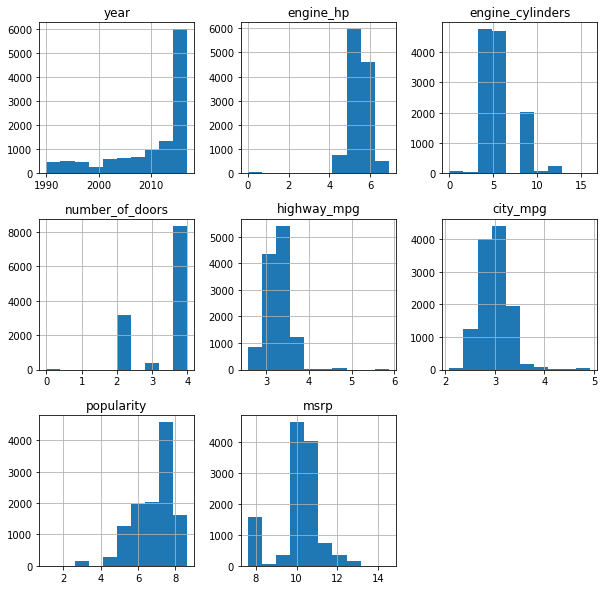

In [380]:
viz = df_final[num_cols]
viz.hist(figsize=(10,10))
plt.show()

Now, let's plot each of these features against the msrp, to see how linear their relationship is:

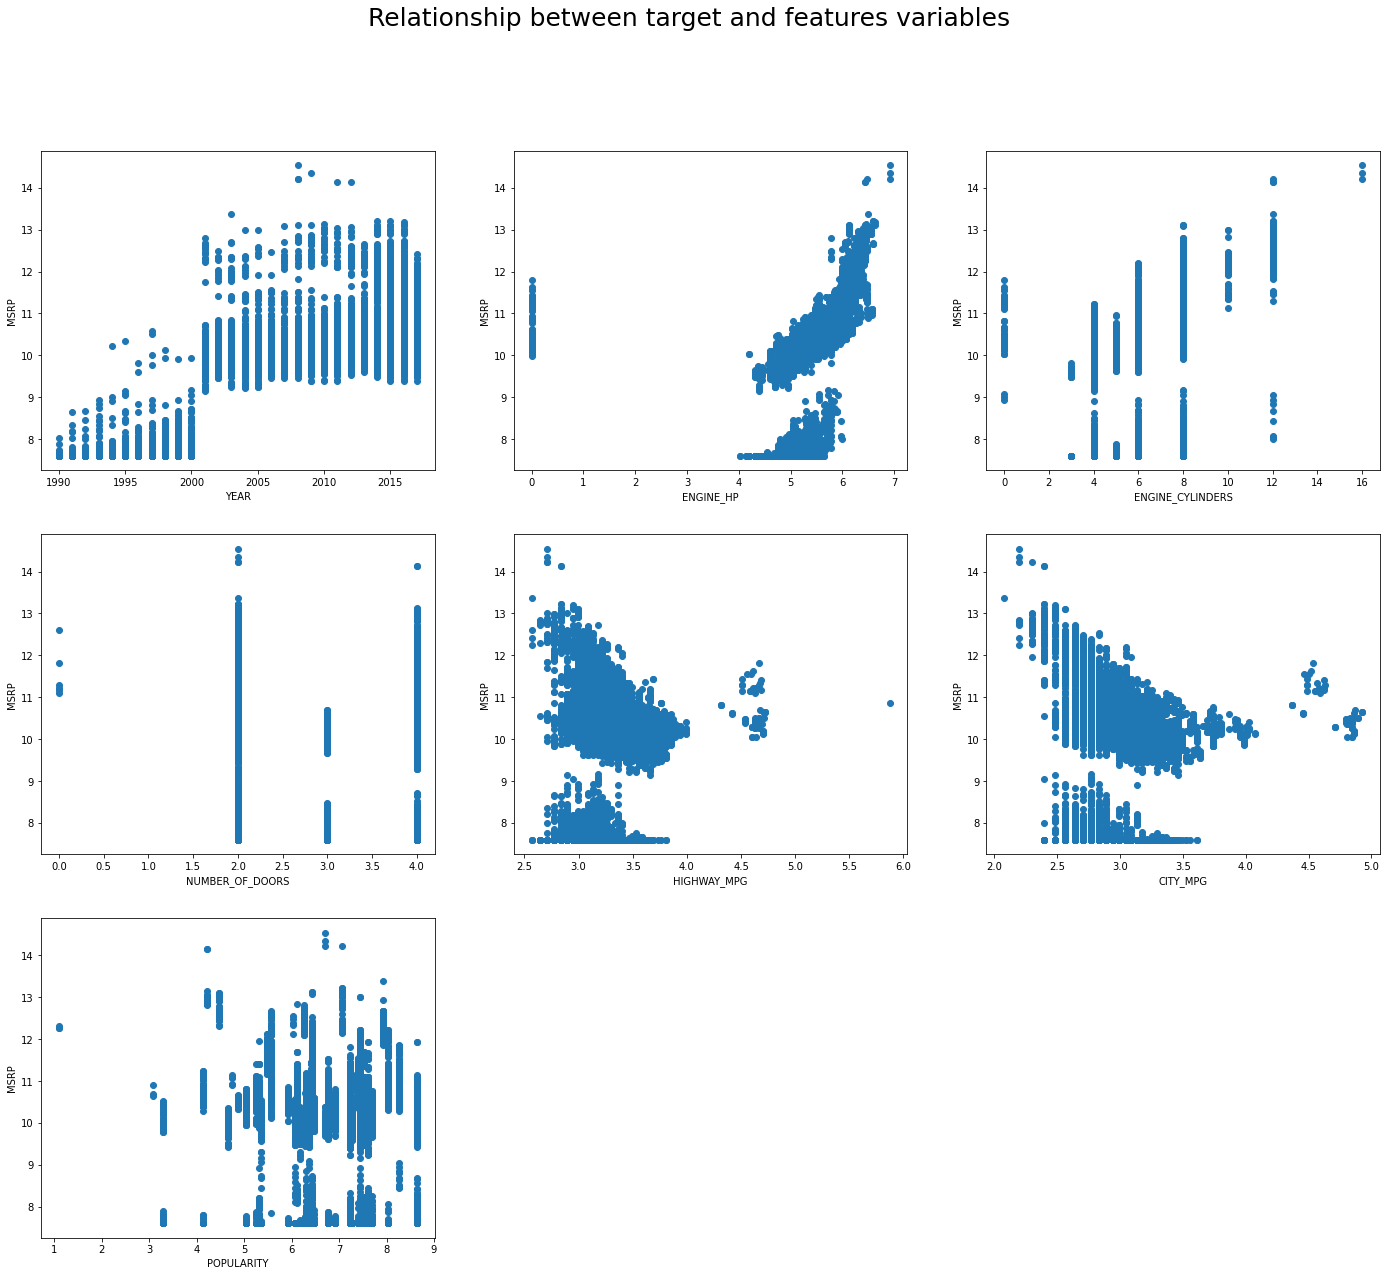

In [381]:
plt.figure(figsize=(24,20))
plt.suptitle('Relationship between target and features variables', size=25)

for var , i in zip(num_cols,np.arange(1,len(num_cols))):
    # if var == 'msrp':
    #     continue
    plt.subplot(3,3,i)
    plt.scatter(df_final[var], df_final.msrp)
    plt.xlabel(f"{var.upper()}")
    plt.ylabel("MSRP")


In [383]:
corr = df_final.corr()

Text(0.5, 1.0, 'Heatmap for all variables')

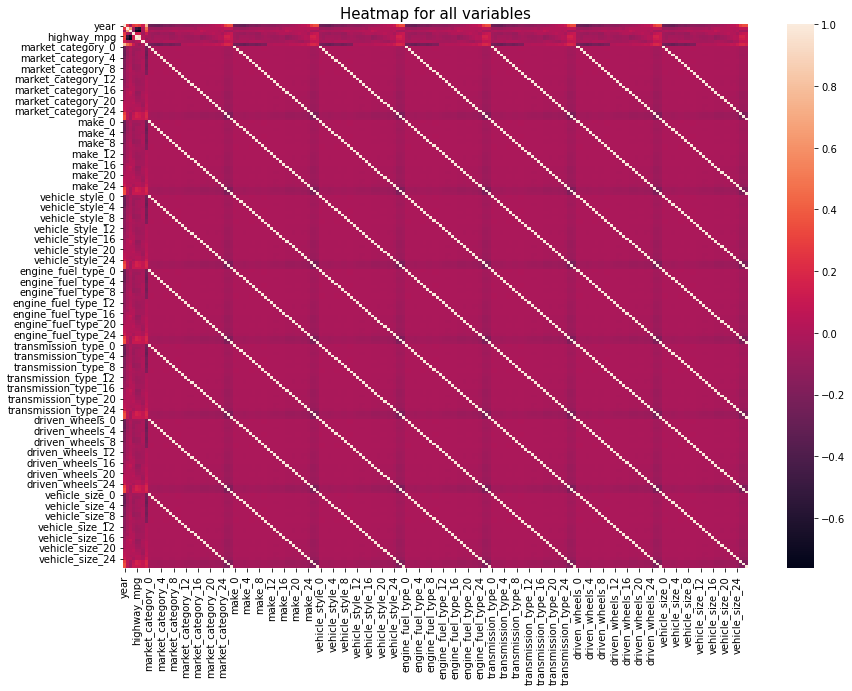

In [384]:
plt.figure(figsize=(14,10))
sns.heatmap(corr)
plt.title('Heatmap for all variables', size=15)

### Pre-processing

In [392]:
y_col = 'msrp'
feature_cols = [x for x in df_final.columns if x != y_col]
X = df_final[feature_cols]
y = df_final[y_col]


In [393]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [394]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

### Linear Regression Model with k-fold

In [395]:
# Cross validation
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  2  4  5  8  9 10 11 12 13] 7942
Test index: [ 1  3  6  7 16 18 22 24 27 29] 3972

Train index: [ 0  1  2  3  4  6  7  8 10 12] 7943
Test index: [ 5  9 11 13 14 15 17 21 25 26] 3971

Train index: [ 1  3  5  6  7  9 11 13 14 15] 7943
Test index: [ 0  2  4  8 10 12 19 20 23 28] 3971



In [396]:
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.8817123226487079, 0.8883290998836573, 0.8822073564797046]

### Pipeline and cross_val_predict

In [398]:
s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

cross_val_predict is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

In [400]:
predictions = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions)


0.8839687957509155

In [401]:
np.mean(scores) # almost identical!

0.8838505715198491

### Linear Regression with train_test_split

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=72018)

s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
linear_r2 = r2_score(y_pred_s, y_test)
linear_r2

0.8715094693047795

In [403]:
linear_reg_rmse = rmse(y_test, y_pred_s)
print(linear_reg_rmse)

linear_mae = mean_absolute_error(y_test, y_pred_s)
print(linear_mae)

linear_mse = mean_squared_error(y_test, y_pred_s)
print(linear_mse)

0.37758727630251987
0.27565789951777925
0.1425721512255555


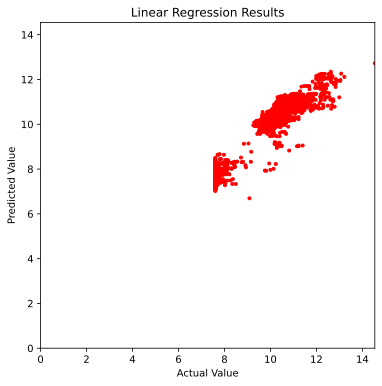

In [404]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred_s, color='red',
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Value', 
       ylabel='Predicted Value', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')
plt.show()

In [411]:
# pair the feature names with the coefficients
pd.DataFrame(list(zip(X.columns, lr_s.coef_))).rename(columns={0: 'feature',1:'coefficient'})

,feature,coefficient
0,year,-7.921316e+11
1,engine_hp,6.573486e-02
2,engine_cylinders,3.902702e-01
3,number_of_doors,-8.726883e-02
4,highway_mpg,2.245712e-02
...,...,...
198,vehicle_size_23,-6.061041e+11
199,vehicle_size_24,8.457536e+11
200,vehicle_size_25,-8.397046e+11
201,vehicle_size_26,-8.373025e+11


### Hyperparameter tuning

In [407]:
# Lassso Regression
alphas = np.geomspace(0.001, 1.0, 20)
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [414]:
pd.DataFrame(list(zip(alphas,scores))).rename(columns={0: 'alpha',1:'score'})

,alpha,score
0,0.001000,0.884177
1,0.001438,0.884142
2,0.002069,0.884070
3,0.002976,0.883935
4,0.004281,0.883654
5,0.006158,0.883061
6,0.008859,0.881824
7,0.012743,0.879667
8,0.018330,0.875554
9,0.026367,0.867410


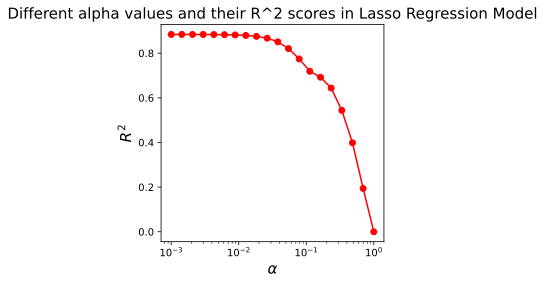

In [421]:
plt.figure(figsize=(4,4))
plt.semilogx(alphas, scores, '-o', color='red')
plt.xlabel('$\\alpha$', size=15)
plt.ylabel('$R^2$', size=15)
plt.title('Different alpha values and their R^2 scores in Lasso Regression Model', size=15)
plt.show()

### Add Polynomial Features to Pipeline and use Grid Search CV

In [422]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.06, 6.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [423]:
grid.fit(X, y)


C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([0.06      , 0.0764565 , 0.0974266 , 0.12414828, 0.15819905,
       0.2015891 , 0.25687994, 0.32733569, 0.41711568, 0.53152007,
       0.67730274, 0.86306993, 1.09978843, 1.40143288, 1.78581086,
       2.27561411, 2.89975814, 3.69508927, 4.70855982, 6.        ]),
                         'polynomial_features__degree': [1, 2, 3]})

In [424]:
grid.best_score_, grid.best_params_

(0.9288946480400521,
 {'lasso_regression__alpha': 0.06, 'polynomial_features__degree': 2})

In [426]:
y_predict = grid.predict(X)
lasso_r2 = r2_score(y, y_predict)
print(f'lasso_r2 = {lasso_r2}')
lasso_rmse = rmse(y, y_predict)
print(f'lasso_rmse = {lasso_rmse}')
lasso_mae = mean_absolute_error(y, y_predict)
print(f'lasso_mae = {lasso_mae}')
lasso_mse = mean_squared_error(y, y_predict)
print(f'lasso_mse = {lasso_mse}')

lasso_r2 = 0.9292161456086717
lasso_rmse = 0.2941625820362163
lasso_mae = 0.21386585879610043
lasso_mse = 0.0865316246702137


In [428]:
# Ridge Regression
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(0.06, 6.0, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

In [429]:
pd.DataFrame(list(zip(alphas,scores))).rename(columns={0: 'alpha',1:'score'})

,alpha,score
0,0.060000,0.949463
1,0.076456,0.949468
2,0.097427,0.949473
3,0.124148,0.949480
4,0.158199,0.949489
5,0.201589,0.949500
6,0.256880,0.949514
7,0.327336,0.949532
8,0.417116,0.949555
9,0.531520,0.949583


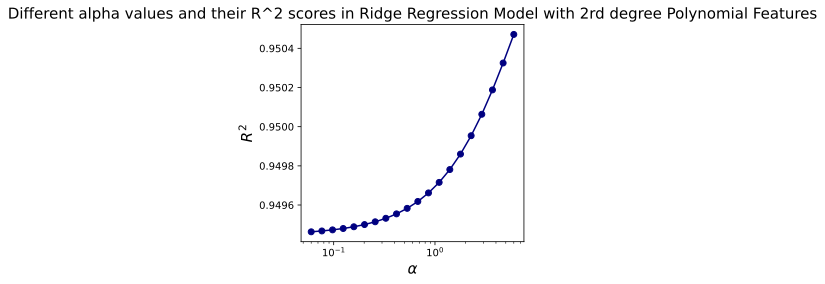

In [431]:
plt.figure(figsize=(4,4))
plt.semilogx(alphas, scores, '-o', color='navy')
plt.xlabel('$\\alpha$', size=15)
plt.ylabel('$R^2$', size=15)
plt.title('Different alpha values and their R^2 scores in Ridge Regression Model with 2rd degree Polynomial Features',
          size=15)
plt.show()

In [432]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.06, 6.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [433]:
grid.fit(X, y)

C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\ZolTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([0.06      , 0.0764565 , 0.0974266 , 0.12414828, 0.15819905,
       0.2015891 , 0.25687994, 0.32733569, 0.41711568, 0.53152007,
       0.67730274, 0.86306993, 1.09978843, 1.40143288, 1.78581086,
       2.27561411, 2.89975814, 3.69508927, 4.70855982, 6.        ])})

In [434]:
grid.best_score_, grid.best_params_


(0.9504117448554849,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 6.0})

In [436]:

y_predict = grid.predict(X)
ridge_r2 = r2_score(y, y_predict)
print(f'ridge_r2 = {ridge_r2}')
ridge_rmse = rmse(y, y_predict)
print(f'ridge_rmse = {ridge_rmse}')
ridge_mae = mean_absolute_error(y, y_predict)
print(f'ridge_mae = {ridge_mae}')
ridge_mse = mean_squared_error(y, y_predict)
print(f'ridge_mse = {ridge_mse}')


ridge_r2 = 0.9538489904485896
ridge_rmse = 0.23752587573431147
ridge_mae = 0.17218486441769787
ridge_mse = 0.05641854164335157


### Model Evaluation Metrics for Regression


Mean Absolute Error (MAE) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

Mean Squared Error (MSE) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

Root Mean Squared Error (RMSE) is the square root of Mean Squared error. It measures the standard deviation of residuals.

R-squared (R2) which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model. The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

Now, let's compare how different metrics looks like in different model: Linear Regression, Lasso and Ridge Regression

In [437]:
rmse_vals = [linear_reg_rmse, ridge_rmse, lasso_rmse]
r2_vals = [linear_r2, ridge_r2, lasso_r2]
mae_vals = [linear_mae, ridge_mae, lasso_mae]
mse_vals = [linear_mse, ridge_mse, lasso_mse]

labels = ['Linear', 'Ridge', 'Lasso']

metrics = {'MAE': mae_vals, 'MSE': mse_vals, 'RMSE': rmse_vals, 'R^2': r2_vals}
metrics_df = pd.DataFrame(metrics, index=labels)

metrics_df

,MAE,MSE,RMSE,R^2
Linear,0.275658,0.142572,0.377587,0.871509
Ridge,0.172185,0.056419,0.237526,0.953849
Lasso,0.213866,0.086532,0.294163,0.929216


# Conclusion
This analysis shows that feature engineering can have a large effect on the model performance, and if the data are sufficiently large, cross-validation should be preferred over train-test-split to construct model evaluation. In my case, even though the predictors have high multicollinearity, their coefficients were not shrunk by the Lasso model, and it is shown that regularization does not always make big improvement on a given model. In the end, the Lasso regression has the highest $R^2$ when predicting on the test set, and categories of car model appear to be the most important features to predict a car price. Also, Lasso did shrink some of the features that are not so important in terms of prediction.